In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("covid.csv")
data.head()

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,Low,Low,Low,High,Normal,Normal,True
1,2,Low,Low,Normal,High,Normal,High,True
2,3,Low,High,Normal,High,Normal,Normal,False
3,4,Low,High,Normal,High,High,Normal,True
4,5,Low,Normal,High,High,Normal,Normal,False


In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
pc = le.fit_transform(data['pc'].values)
wbc = le.fit_transform(data['wbc'].values)
mc = le.fit_transform(data['mc'].values)
ast = le.fit_transform(data['ast'].values)
bc = le.fit_transform(data['bc'].values)
ldh = le.fit_transform(data['ldh'].values)
y = le.fit_transform(data['diagnosis'].values)

X = np.array(list(zip(pc, wbc, mc, ast, bc, ldh)))

In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, roc_curve,auc
model = MultinomialNB()

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)


In [55]:
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [56]:
print("Accuracy:",accuracy_score(Y_test, y_pred))
print("\nReport")
print(classification_report(Y_test,y_pred))

Accuracy: 0.8

Report
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



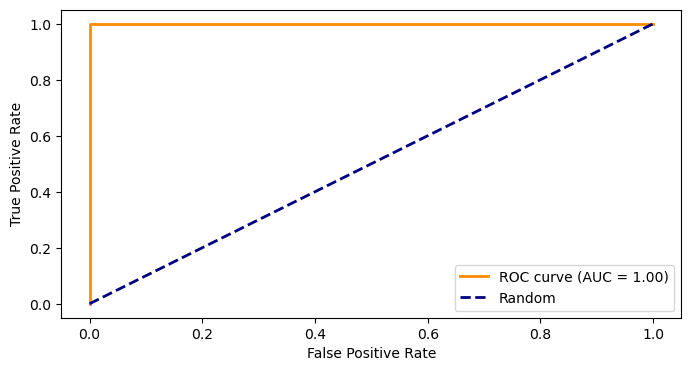

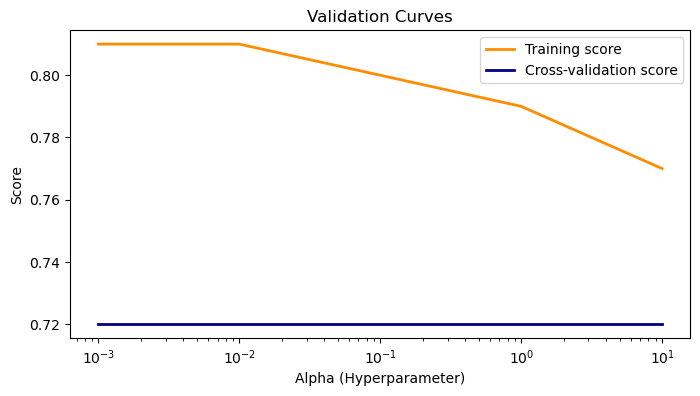

In [57]:
import matplotlib.pyplot as plt
lr_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, lr_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0]  # Replace with the range of values you want to test
train_scores, test_scores = validation_curve(
    MultinomialNB(), X, y, param_name="alpha", param_range=param_range, cv=5
)

# Plot validation curves
plt.figure(figsize=(8, 4))
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training score", color="darkorange", lw=2)
plt.plot(param_range, np.mean(test_scores, axis=1), label="Cross-validation score", color="navy", lw=2)
plt.xscale('log')  # Log scale for better visualization if 'alpha' values vary widely
plt.xlabel('Alpha (Hyperparameter)')
plt.ylabel('Score')
plt.title('Validation Curves')
plt.legend()
plt.show()